In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd

In [7]:
df = pd.read_excel("webinar_leads.xlsx")
df2 = pd.read_excel("webinar_to_tokenspaid.xlsx")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42784 entries, 0 to 42783
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   lead_id              29626 non-null  object        
 1   attended             42784 non-null  object        
 2   phone                38419 non-null  object        
 3   approval_status      42784 non-null  object        
 4   time_in_session      42784 non-null  int64         
 5   country_region_name  4573 non-null   object        
 6   source_name          13352 non-null  object        
 7   original_source      37947 non-null  object        
 8   contacted            33688 non-null  object        
 9   webinar_date         42784 non-null  datetime64[ns]
 10  registration_date    42784 non-null  datetime64[ns]
 11  registration_time    42784 non-null  object        
 12  webinar_join_date    4573 non-null   object        
 13  webinar_join_time    4573 non-n

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   lead_id                                211 non-null    object        
 1   attended                               211 non-null    object        
 2   phone                                  191 non-null    float64       
 3   approval_status                        211 non-null    object        
 4   time_in_session                        211 non-null    int64         
 5   country_region_name                    89 non-null     object        
 6   source_name                            107 non-null    object        
 7   original_source                        211 non-null    object        
 8   contacted                              210 non-null    object        
 9   webinar_date                           211 non-null    datetime64

# Webinar leads

## Attendance Analysis
 Most of the registered candidates haven't attended the meeting.

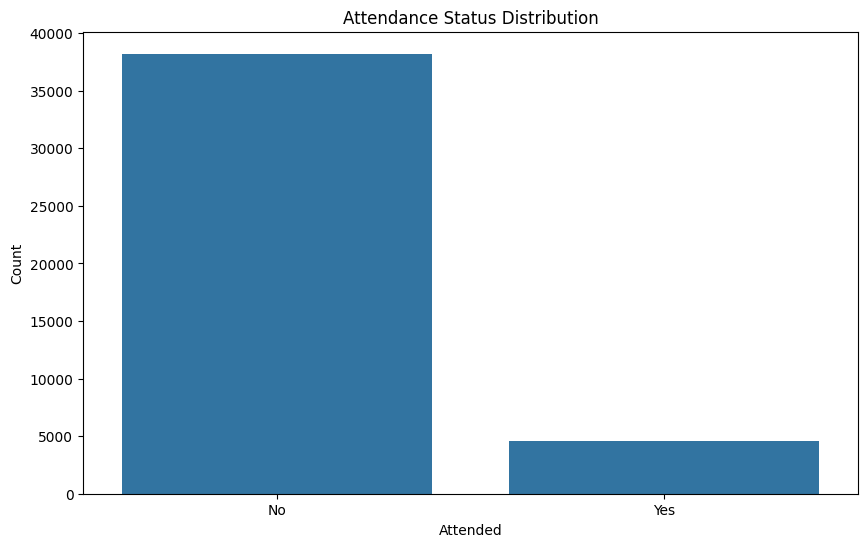

In [10]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='attended')
plt.title('Attendance Status Distribution')
plt.xlabel('Attended')
plt.ylabel('Count')

plt.show()

## Distribution of Session Duration

we can see here that the time in session significantly decreases with time

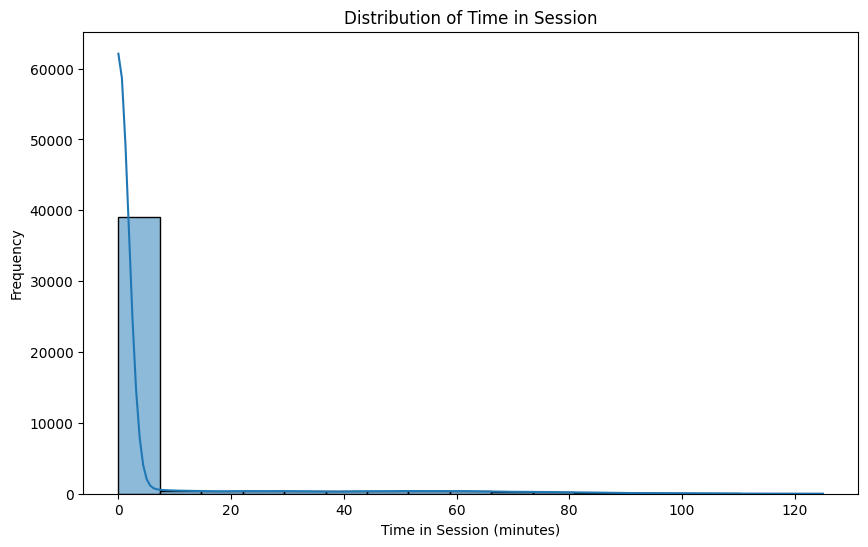

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['time_in_session'], kde=True)
plt.title('Distribution of Time in Session')
plt.xlabel('Time in Session (minutes)')
plt.ylabel('Frequency')
plt.show()

## Distribution of Registrations Over Time

No insightful pattern found here

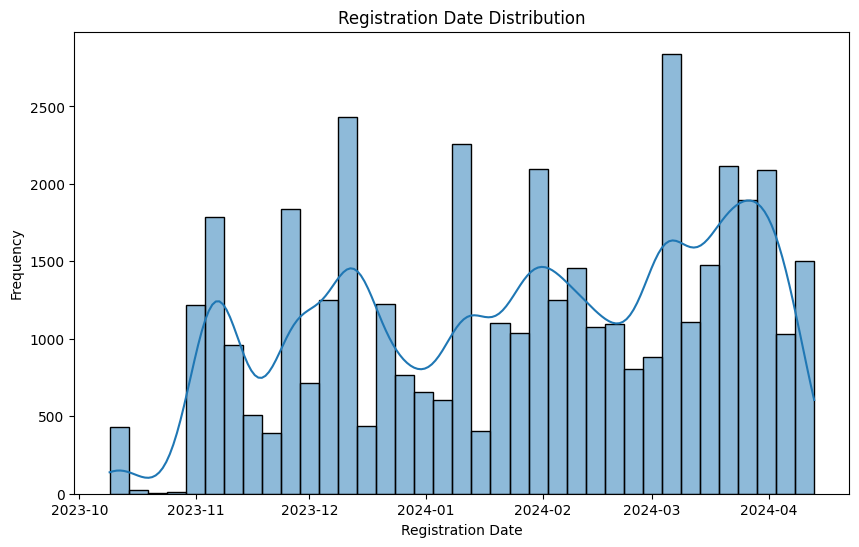

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['registration_date'].dropna(), kde=True)
plt.title('Registration Date Distribution')
plt.xlabel('Registration Date')
plt.ylabel('Frequency')
plt.show()

## Distribution of Sources

Here we can see that facebook has generated the most amount of leads


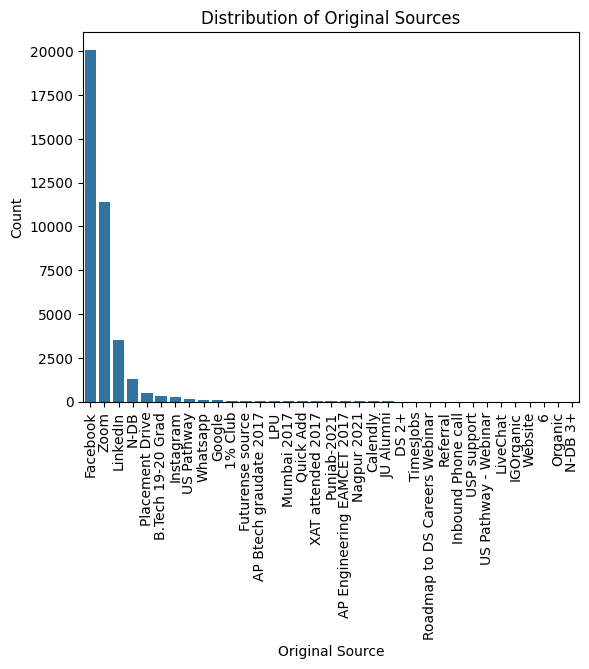

In [13]:
sns.countplot(data=df, x='original_source', order=df['original_source'].value_counts().index)
plt.title('Distribution of Original Sources')
plt.xlabel('Original Source')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Source distribution and attendance

we can see here that facebook, zoom and linkedin are the major sources of leads.

Also, most of the registered leads haven't attended the meet

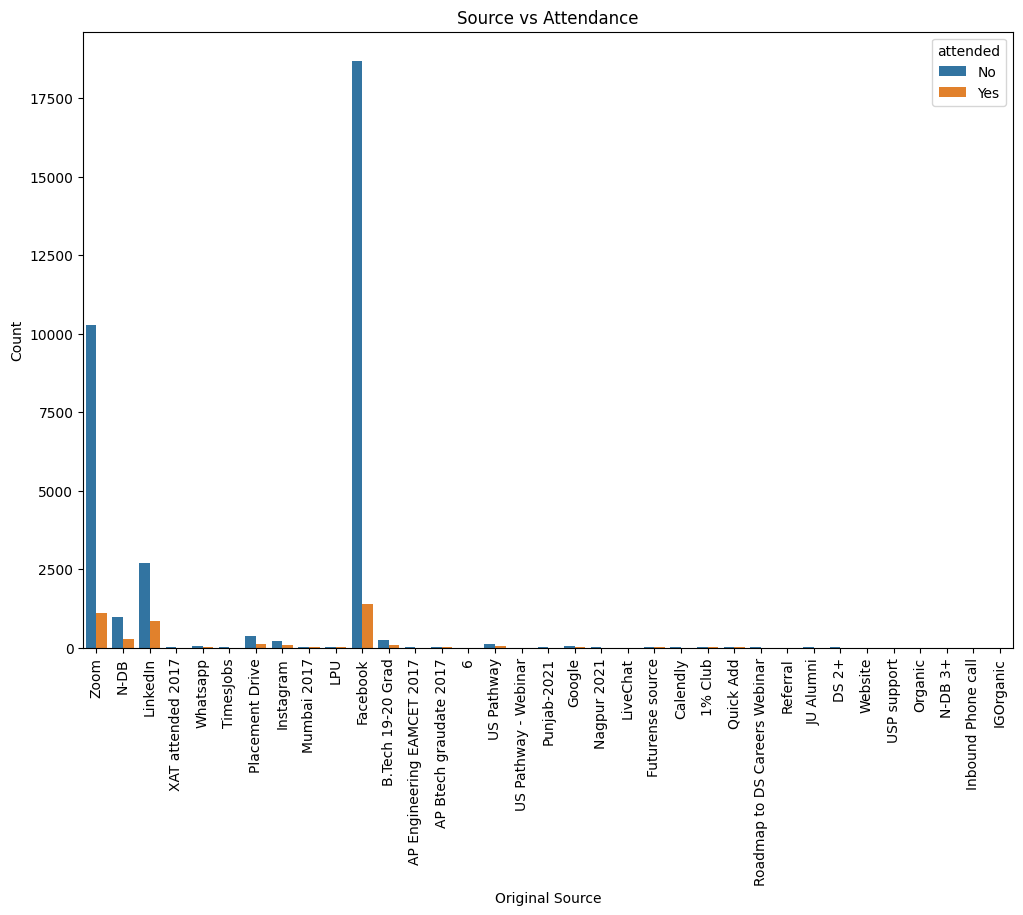

In [14]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='original_source', hue='attended')
plt.title('Source vs Attendance')
plt.xlabel('Original Source')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Attendance duration

Here we can see the attendance duration of potential customers

1. Most of the customers leave the webinar in the first 5 minutes. So, it is necessary to keep the meet at a fast pace from the beginning.

2. And 12 noon is the time when the most clients are active in the webinar.

In [15]:
df['attendance_duration'] = (
    pd.to_datetime(df['webinar_leave_time'], format='%H:%M:%S') -
    pd.to_datetime(df['webinar_join_time'], format='%H:%M:%S')
).dt.total_seconds() / 60  # Convert to minutes

print(df[['webinar_join_time', 'webinar_leave_time', 'attendance_duration']].head())


  webinar_join_time webinar_leave_time  attendance_duration
0               NaN                NaN                  NaN
1               NaN                NaN                  NaN
2               NaN                NaN                  NaN
3               NaN                NaN                  NaN
4               NaN                NaN                  NaN


In [18]:
fig = px.histogram(df, x='time_in_session', nbins=50, title='Distribution of Attendance Durations')
fig.show()

df['join_hour'] = pd.to_datetime(df['webinar_join_time'], format='%H:%M:%S').dt.hour
df['leave_hour'] = pd.to_datetime(df['webinar_leave_time'], format='%H:%M:%S').dt.hour

# Aggregate the number of attendees joining and leaving by hour
join_counts = df.groupby('join_hour').size().reset_index(name='join_count')
leave_counts = df.groupby('leave_hour').size().reset_index(name='leave_count')

# Merge join and leave counts for plotting
attendance_timeline = pd.merge(join_counts, leave_counts, left_on='join_hour', right_on='leave_hour', how='outer').fillna(0)
attendance_timeline['hour'] = attendance_timeline[['join_hour', 'leave_hour']].max(axis=1)
attendance_timeline = attendance_timeline.sort_values('hour')

# Plot the timeline of join and leave counts
fig = px.line(attendance_timeline, x='hour', y=['join_count', 'leave_count'], title='Join and Leave Timeline', labels={'value': 'Number of Attendees', 'hour': 'Hour of Day'})
fig.show()

# Webinar to tokens paid

## Distribution of payment across the cohort duration

- Here we can see that the January to April are the peak months and it's prevalent that february and march are the most active months

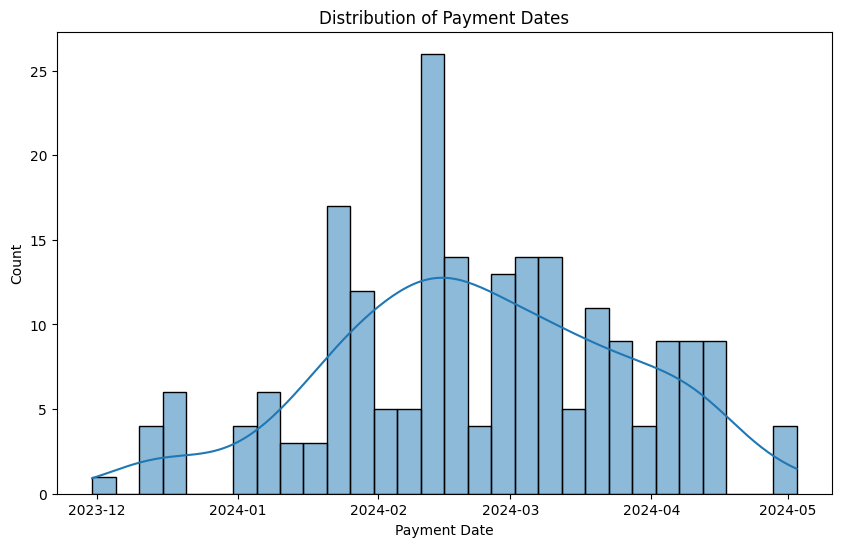

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['Tokens Paid.paid_date'], bins=30, kde=True)
plt.title('Distribution of Payment Dates')
plt.xlabel('Payment Date')
plt.ylabel('Count')
plt.show()

## Counsellor and Agent performance tracker

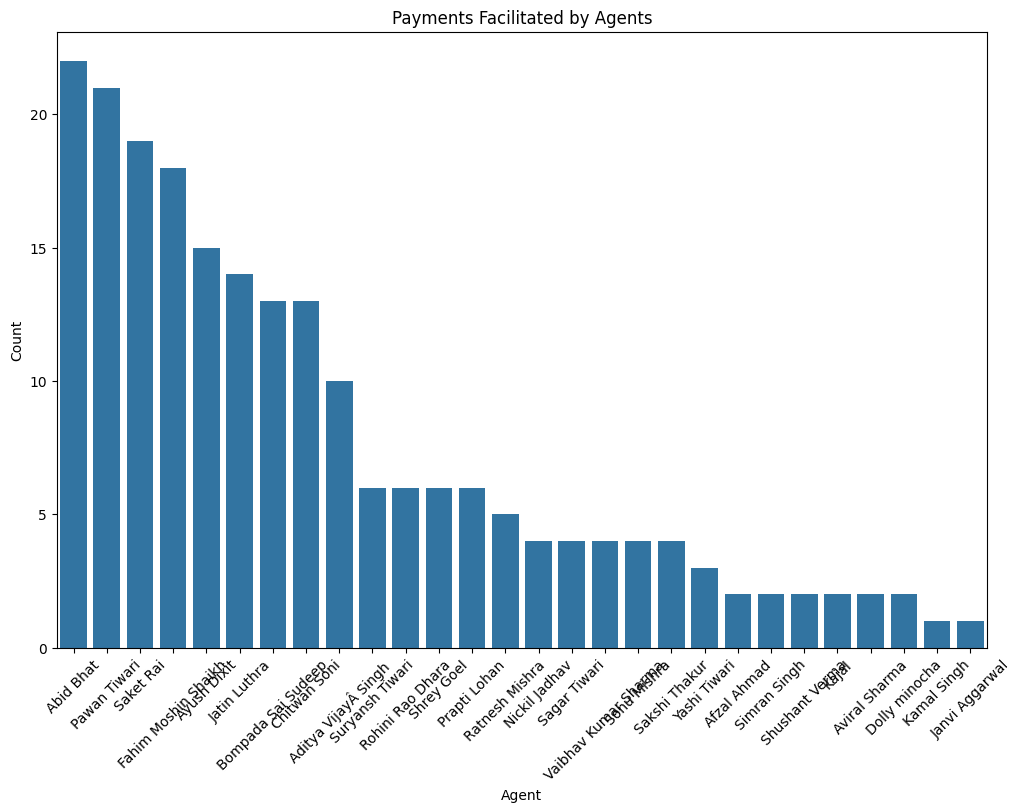

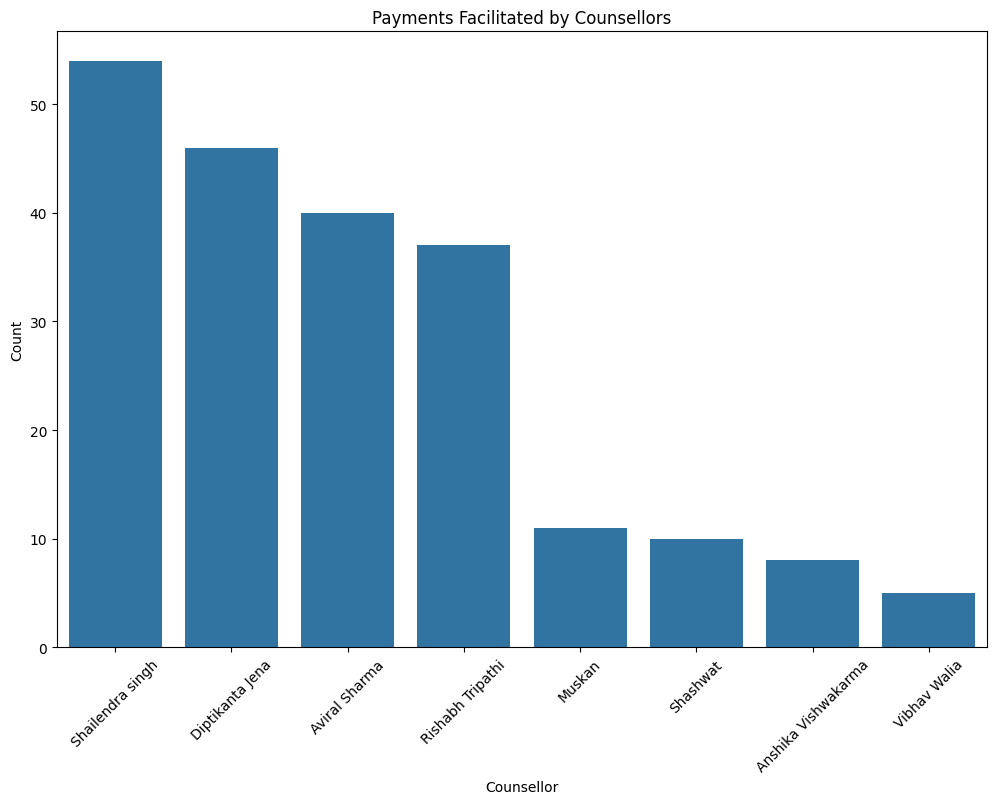

In [43]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df2, x='Tokens Paid.agent', order=df2['Tokens Paid.agent'].value_counts().index)
plt.title('Payments Facilitated by Agents')
plt.xlabel('Agent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df2, x='Tokens Paid.counsellor', order=df2['Tokens Paid.counsellor'].value_counts().index)
plt.title('Payments Facilitated by Counsellors')
plt.xlabel('Counsellor')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## payment source

Even here it's prevalent that facebook has not only genereted more leads but also major portion of the converted leads are from facebook

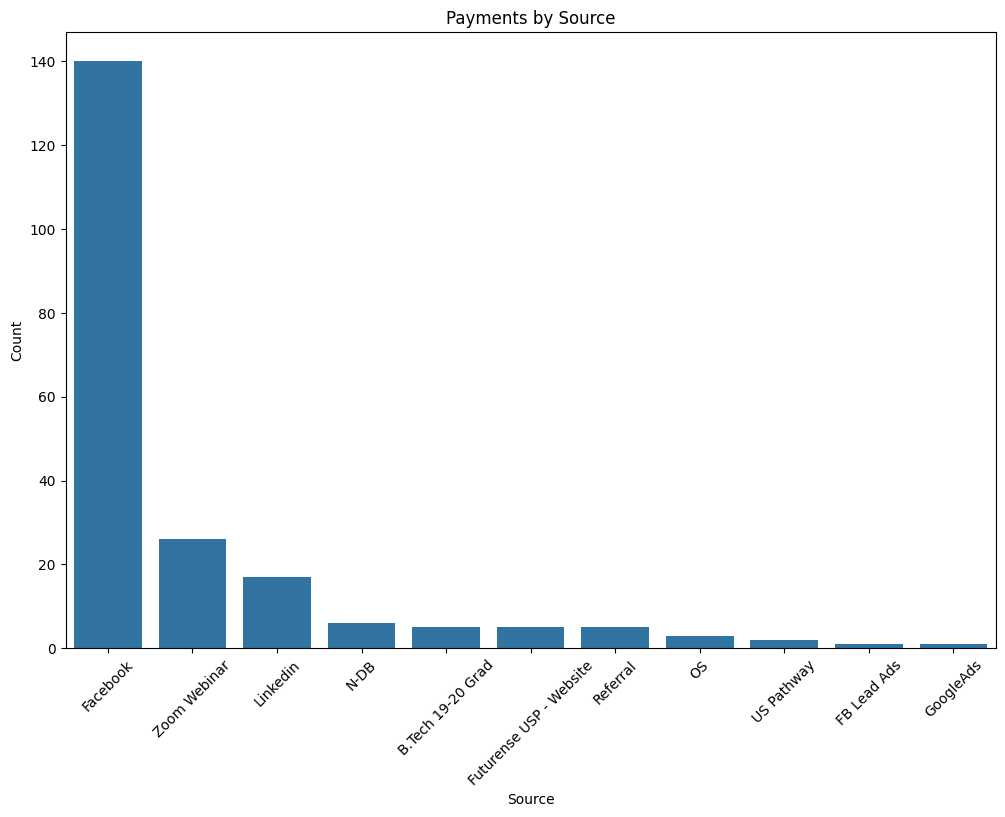

In [44]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df2, x='Tokens Paid.source', order=df2['Tokens Paid.source'].value_counts().index)
plt.title('Payments by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## How long does it take for leads to pay the token amount after the webinar?

- Here we can see majority of our customers pay the token within 50 days. Which is a good sign of the performance of counsellors and agents.

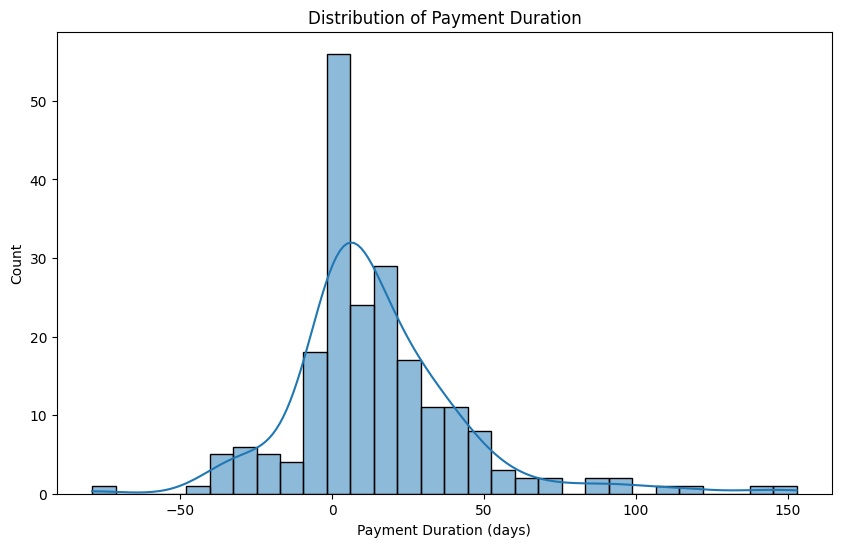

In [45]:
df2['payment_duration_days'] = (df2['Tokens Paid.paid_date'] - df2['webinar_date']).dt.days
plt.figure(figsize=(10, 6))
sns.histplot(df2['payment_duration_days'], bins=30, kde=True)
plt.title('Distribution of Payment Duration')
plt.xlabel('Payment Duration (days)')
plt.ylabel('Count')
plt.show()


# Summary report

## Attendance Analysis
- Most of the registered candidates haven't attended the meeting.

## Distribution of Session Duration
- The time in session significantly decreases over time.

## Distribution of Registrations Over Time
- No insightful pattern found here.

## Distribution of Sources
- Facebook has generated the most amount of leads.

## Source Distribution and Attendance
- Major sources of leads are Facebook, Zoom, and LinkedIn.
- Most of the registered leads haven't attended the meet.

## Attendance Duration
- Most of the customers leave the webinar within the first 5 minutes.
- It is necessary to keep the meet at a fast pace from the beginning.
- 12 noon is the time when the most clients are active in the webinar.

## Distribution of Payment Across the Cohort Duration
- January to April are the peak months for payments.
- February and March are the most active months for payments.

## Payment Source
- Facebook has not only generated more leads but also a major portion of the converted leads.

## Lead Payment Timing
- Majority of our customers pay the token within 50 days after the webinar.
- This indicates good performance by the counselors and agents.

---

